<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/Top_Insta_influencer_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [ ]:
# Read CSV
df = pd.read_csv('/content/top_insta_influencers_data.csv')
print(df.head())

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


In [ ]:
# Quick info
print('\Data types:')
print(df.dtypes)

# Clean numeric columns: remove k, m, b and convert to numbers
def parse_number(x):
    if pd.isna(x):
        return None
    s = str(x).strip()
    # remove commas
    s = s.replace(',','')
    mul = 1
    if s.endswith('k'):
        mul = 1e3
        s = s[:-1]
    elif s.endswith('m'):
        mul = 1e6
        s = s[:-1]
    elif s.endswith('b'):
        mul = 1e9
        s = s[:-1]
    try:
        return float(s) * mul
    except:
        # strip percent
        if s.endswith('%'):
            try:
                return float(s[:-1])
            except:
                return None
        return None

\Data types:
rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object


In [ ]:
# Apply parser
for col in ['posts','followers','avg_likes','new_post_avg_like','total_likes']:
    if col in df.columns:
        df[col+'_num'] = df[col].apply(parse_number)

# Parse engagement percent
if '60_day_eng_rate' in df.columns:
    df['60_day_eng_rate_num'] = df['60_day_eng_rate'].astype(str).str.replace('%','').astype(float)

print('\Cleaned head:')
print(df.head())

# Basic stats
print('\Summary stats for numeric cols:')
print(df[['influence_score','posts_num','followers_num','avg_likes_num','60_day_eng_rate_num','new_post_avg_like_num','total_likes_num']].describe())

\Cleaned head:
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  posts_num  \
0           1.39%              6.5m       29.0b          Spain     3300.0   
1           1.62%              5.9m       57.4b  United States     6900.0   
2           1.24%              4.4m        6.0b            NaN      890.0   
3           0.97%              3.3m       11.5b  United States     1800.0   
4           0.20%            665.3k       12.5b  United States     6800.0   

   followers_num  avg_likes_num  new_post_avg_like_num  total_likes_num  \
0    475800000.0      8700000.0       

\Top by followers:
   rank     channel_info followers  followers_num
0     1        cristiano    475.8m    475800000.0
1     2      kyliejenner    366.2m    366200000.0
2     3         leomessi    357.3m    357300000.0
3     4      selenagomez    342.7m    342700000.0
4     5          therock    334.1m    334100000.0
5     6    kimkardashian    329.2m    329200000.0
6     7     arianagrande    327.7m    327700000.0
7     8          beyonce    272.8m    272800000.0
8     9  khloekardashian    268.3m    268300000.0
9    10     justinbieber    254.5m    254500000.0


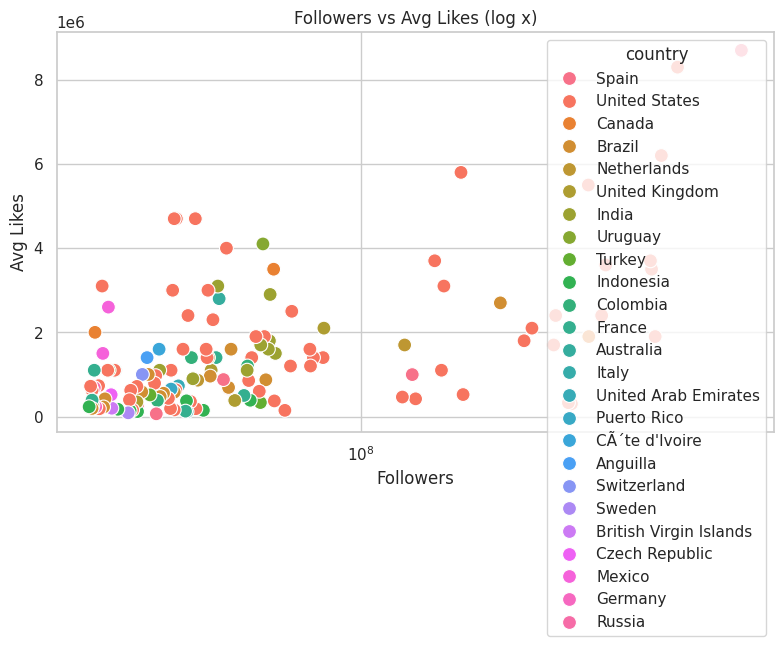

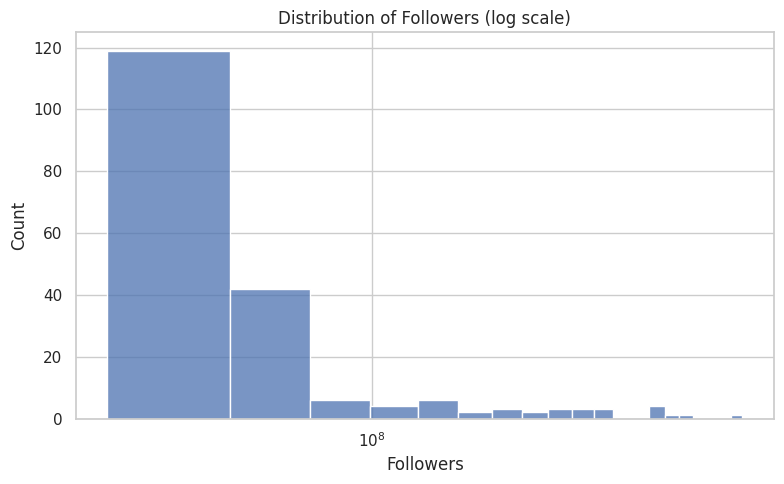

In [ ]:
# Top 10 by followers
top_followers = df.sort_values('followers_num',ascending=False).head(10)
print('\Top by followers:')
print(top_followers[['rank','channel_info','followers','followers_num']])

# Visualizations: followers vs avg_likes scatter, followers distribution, engagement vs followers
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='followers_num', y='avg_likes_num', hue='country', s=100)
plt.xscale('log')
plt.title('Followers vs Avg Likes (log x)')
plt.xlabel('Followers')
plt.ylabel('Avg Likes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['followers_num'].dropna(), bins=20, kde=False)
plt.xscale('log')
plt.title('Distribution of Followers (log scale)')
plt.xlabel('Followers')
plt.tight_layout()
plt.show()

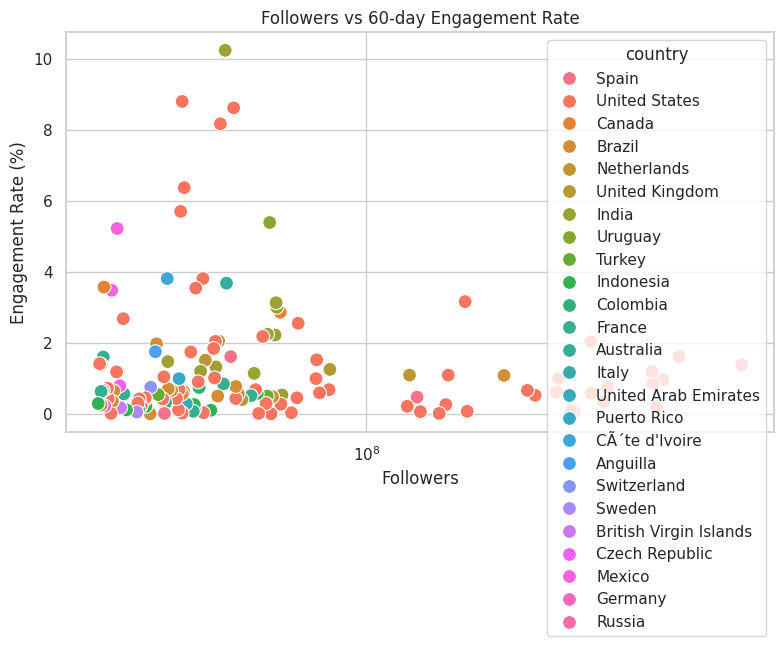

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='followers_num', y='60_day_eng_rate_num', hue='country',s=100)
plt.xscale('log')
plt.title('Followers vs 60-day Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate (%)')
plt.tight_layout()
plt.show()
